In [1]:
import pandas as pd
df = pd.read_csv('dataset/dataset.csv', encoding="unicode_escape")

In [2]:
X = df.drop('Etiqueta', axis=1).values
y = df['Etiqueta'].values

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
set(y_train)

{'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 'Ñ'}

In [6]:
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
import numpy as np
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [7]:
print(X_train.shape) # Debería mostrar (número de muestras de entrenamiento, número de sensores y valores de giroscopio)
print(y_train.shape) # Debería mostrar (número de muestras de entrenamiento, número de clases)

(5745, 5)
(5745, 27)


In [13]:
y

array(['A', 'B', 'C', ..., 'X', 'Y', 'Z'], dtype=object)

**MODELO**

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
# Definir la arquitectura de la red neuronal
model = Sequential()
model.add(Dense(64, input_dim=5, activation='relu')) # Capa de entrada con N neuronas y función de activación ReLU
model.add(Dense(128, activation='relu')) # Capa oculta con 128 neuronas y función de activación ReLU
model.add(Dropout(0.5)) # Dropout para evitar el sobreajuste
model.add(Dense(27, activation='softmax')) # Capa de salida con 27 neuronas y función de activación softmax
# Compilar el modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) # Función de pérdida, algoritmo de optimización y métricas de evaluación

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                384       
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 27)                3483      
                                                                 
Total params: 12,187
Trainable params: 12,187
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test)) # Datos de entrenamiento, épocas, tamaño del lote y datos de validación

Epoch 1/50
180/180 [==============================] - 1s 4ms/step - loss: 3.3034 - accuracy: 0.0357 - val_loss: 3.2983 - val_accuracy: 0.0431
Epoch 2/50
180/180 [==============================] - 0s 2ms/step - loss: 3.2963 - accuracy: 0.0378 - val_loss: 3.2989 - val_accuracy: 0.0341
Epoch 3/50
180/180 [==============================] - 0s 2ms/step - loss: 3.2956 - accuracy: 0.0393 - val_loss: 3.2996 - val_accuracy: 0.0327
Epoch 4/50
180/180 [==============================] - 0s 2ms/step - loss: 3.2943 - accuracy: 0.0407 - val_loss: 3.3000 - val_accuracy: 0.0355
Epoch 5/50
180/180 [==============================] - 0s 2ms/step - loss: 3.2926 - accuracy: 0.0463 - val_loss: 3.3007 - val_accuracy: 0.0334
Epoch 6/50
180/180 [==============================] - 0s 2ms/step - loss: 3.2903 - accuracy: 0.0456 - val_loss: 3.3028 - val_accuracy: 0.0418
Epoch 7/50
180/180 [==============================] - 0s 2ms/step - loss: 3.2911 - accuracy: 0.0460 - val_loss: 3.3019 - val_accuracy: 0.0404
Epoch 

In [11]:
# Evaluar el modelo
loss, accuracy = model.evaluate(X_test, y_test) # Datos de evaluación
print("Loss: ", loss)
print("Accuracy: ", accuracy)

45/45 [==============================] - 0s 1ms/step - loss: 3.3483 - accuracy: 0.0452
Loss:  3.3483004570007324
Accuracy:  0.04523312300443649


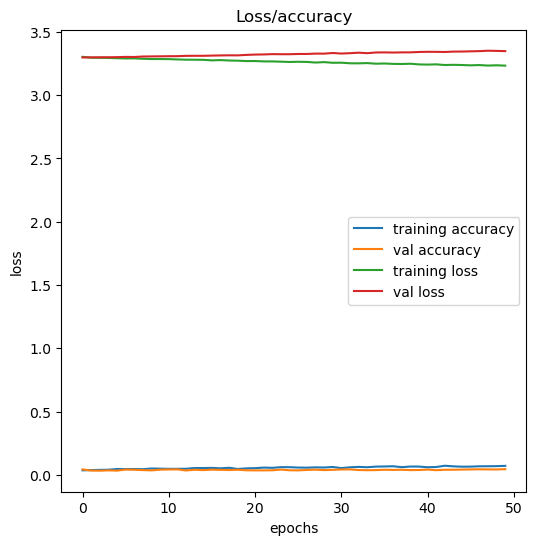

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss/accuracy')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()